<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/01_kMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning**


Unsupervised learning is a type of self-organized Hebbian learning that helps find previously unknown patterns in data set without pre-existing labels. It is also known as self-organization and allows modeling probability densities of given inputs.[1] It is one of the main three categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning has also been described, and is a hybridization of supervised and unsupervised techniques.

**Note:** Hebbian theory is a neuroscientific theory claiming that an increase in synaptic efficacy arises from a presynaptic cell's repeated and persistent stimulation of a postsynaptic cell. It is an attempt to explain synaptic plasticity, the adaptation of brain neurons during the learning process.

The theory is also called Hebb's rule, Hebb's postulate, and cell assembly theory. Hebb states it as follows:

*Let us assume that the persistence or repetition of a reverberatory activity (or "trace") tends to induce lasting cellular changes that add to its stability. ... When an axon of cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased.*

The theory attempts to explain associative or Hebbian learning, in which simultaneous activation of cells leads to pronounced increases in synaptic strength between those cells. It also provides a biological basis for errorless learning methods for education and memory rehabilitation. In the study of neural networks in cognitive function, it is often regarded as the neuronal basis of unsupervised learning.

Source: [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning)

Unsupervised learning finds patterns in data without a specific prediction task. Unlike a supervised learning technique, the labels are not known.

**k-means clustering**

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-Means minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. Better Euclidean solutions can for example be found using k-medians and k-medoids.

Source: [K-means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)

Choose a good number of clusters for a dataset using the k-means inertia graph.

This dataset was sourced from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/seeds

**The Seeds Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

In [35]:
# Download the seeds data using wget (Linux)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2020-01-01 13:44:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.1’

seeds_dataset.txt.1 100%[===================>]   9.08K  --.-KB/s    in 0s      

2020-01-01 13:44:27 (63.4 MB/s) - ‘seeds_dataset.txt.1’ saved [9300/9300]



Import NumPy and Pandas

In [0]:
import numpy as np
import pandas as pd

Load the dataset to an array 'samples' containing the measurements (such as area, perimeter, length, and several others) of samples of grain.

In [0]:
samples = np.genfromtxt('seeds_dataset.txt')

In [46]:
# Test the dataload for the seeds dataset
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [0]:
ks = range(1, 6)
inertias = []

Import the KMeans function from sklearn and pyplot from Matplotlib

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 

K-means is often referred to as Lloyd’s algorithm. 

In basic terms, the algorithm has three steps. 

1. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. 

2. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. 

3. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

Apply KMeans with k clusters:

1.   Model
2.   Fit
3.   Inertias

In [0]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)    

Plot ks and inertias

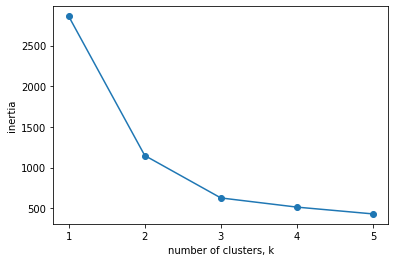

In [44]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()